# NCHS Market Segmentation

![](banner_nchs.jpg)

Cluster Analysis & Evaluation

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Situation

* **Role:** Product Category Manager for Personal Health Management Applications. 
* **Business Decision:** How to segment the market for personal health management products and how many products to develop?
* **Approach:** Use k-means applied to diet survey data to segment the market in various ways and compare relative business value of various product development strategies.
* **Dataset:**  Centers for Disease Control & Prevention, National Center for Health Statistics, National Health & Nutrition Examination Survey 2013-14, Diet Survey (https://www.cdc.gov/nchs/nhanes/index.htm)

## Business Decision Framework

**A decision model.**

How we make money ...

* Potential market share of segment is proportional to cluster share of data.
* Market share is potential market share reduced by inverse intracluster dispersion (times a calibration factor).  So, the more alike people within a segment are, the more the product features can be tuned to those people, the more people will find the product attractive, and the more people will become customers.
* Volume is market share of total market size.


* Revenue is volume times price per product unit.


* Fixed cost is for development of a product.  So, the more segments, the more products will be developed, the more total fixed cost. <br>
_(Fixed cost is variable in terms of number of segments, but not variable in terms of number of product units sold.)_
* Variable cost is for service associated with product units sold.
* Cost is fixed cost plus variable cost times volume.


* Profit is revenue minus cost.

**Influence diagram of decision model.**

![](business_model_influence_diagram.jpg)

**Business parameters.** 

In [2]:
market_size = 100000
calibration = 0.25
price = 999.99
cost.fixed = 150000
cost.variable = 100

data.frame(market_size, calibration, price, cost.fixed, cost.variable)

market_size,calibration,price,cost.fixed,cost.variable
100000,0.25,999.99,150000,100


## Data 

Data Dictionary: https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DR1IFF_H.htm

In [3]:
data = read.csv("diet.csv")
size(data)
head(data)

observations,variables
9813,168


SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,...,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
73557,16888.33,12930.89,1,49,2,2,6,2,1,1,13,3,2,4,2,NA,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,11,1574,43.63,239.59,176.47,10.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
73558,17932.14,12684.15,1,59,2,2,4,1,1,1,13,1,2,3,1,1,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8,5062,338.13,423.78,44.99,16.7,...,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,1,1,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2
73559,59641.81,39394.24,1,49,2,2,18,6,1,1,13,1,1,2,2,NA,1,NA,NA,NA,NA,NA,NA,7,NA,NA,NA,NA,NA,NA,27,1743,64.61,224.39,102.90,9.9,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
73560,142203.07,125966.37,1,54,2,2,21,3,1,1,12,1,1,3,2,NA,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,19,1490,77.75,162.92,80.58,10.6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
73561,59052.36,39004.89,1,63,2,2,18,1,1,1,13,4,NA,4,2,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,91,7,1421,55.24,178.20,87.78,12.3,...,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2
73562,49890.83,0.00,1,49,2,1,11,3,1,1,13,1,3,3,1,1,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,17,1785,55.11,189.59,81.75,22.6,...,2,NA,1,1,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2,NA,2


Set aside observation identifiers, remove variables with all missing data, impute missing data by column means, remove non-varying variables.

In [4]:
datax = data[, -1] # remove identifiers
datax = datax[, var_info.na_count(datax)/nrow(datax) < 1] # remove variables with all missing values
datax = impute(datax) # impute with column means
datax = datax[, var_info.var(datax) != 0]

head(datax)

WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
16888.33,12930.89,1,49,2,2,6,2,1,1,13,3,2.000000,4,2,2.180249,2,11,1574,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209,3.92,0,70,110,60,304,278,1398,430,...,2.110169,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631
17932.14,12684.15,1,59,2,2,4,1,1,1,13,1,2.000000,3,1,1.000000,2,8,5062,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584,20.94,0,1477,1488,0,145,12,0,899,...,2.110169,2.000000,2.042322,2.000000,1.881932,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,1.000000,1.000000,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631
59641.81,39394.24,1,49,2,2,18,6,1,1,13,1,1.000000,2,2,2.180249,1,27,1743,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88,8.87,0,616,655,21,449,35,515,300,...,2.110169,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631
142203.07,125966.37,1,54,2,2,21,3,1,1,12,1,1.000000,3,2,2.180249,2,19,1490,77.75,162.92,80.58,10.6,58.27,23.511,16.986,9.617,187,2.16,0,515,545,20,237,223,0,583,...,2.110169,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631
59052.36,39004.89,1,63,2,2,18,1,1,1,13,4,1.652899,4,2,2.180249,1,7,1421,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,41,53.17,0,738,863,0,1476,0,0,0,...,2.110169,2.000000,2.042322,2.000000,1.881932,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,2.000000,2.020408,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631
49890.83,0.00,1,49,2,1,11,3,1,1,13,1,3.000000,3,1,1.000000,2,17,1785,55.11,189.59,81.75,22.6,93.92,22.155,40.013,23.550,534,12.30,0,272,355,172,776,300,2339,2101,...,2.110169,2.000000,2.042322,1.000000,1.000000,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,2.000000,2.020408,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631


Normalize the dataset.

In [5]:
datax.norm = scale(datax)
head(datax.norm)

WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
-0.4111059,-0.47989322,-0.3745279,0.2679972,0.1334286,0.4032245,-0.9152355,-1.2104875,-0.2970813,-0.2571996,0.4163555,-0.05271334,0.576773,0.7342345,0.1730159,1.128879e-16,0.1411048,-0.7538070,-0.4254569,-0.7411811,-0.02723015,0.98224203,-0.4739902,-0.5253386,-0.46897667,-0.46780197,-0.7315103,-0.2450510,-0.6448514,-0.2623888,-0.9809673,-0.96816299,-0.2888421,-0.41799078,0.6130811,-0.4080687,-0.2983294,...,0,0.0000000,9.320481e-16,0.000000,-6.338235e-16,0.0000000,-1.292613e-15,0.0000000,0,-2.266171e-15,0,0.0000000,0,-6.356789e-15,-8.518529e-15,1.840708e-15,0.000000,0.0000000,0,-6.459393e-16,-4.595095e-16,-1.532546e-15,0,0.0000000,-2.030525e-15,0.00000000,0,0.0000000,-1.966883e-15,0.0000000,-1.423785e-15,0.0000000,3.254103e-15,0.0000000,-4.33993e-16,1.275455e-15,0
-0.3821605,-0.48504129,-0.3745279,0.7827184,0.1334286,0.4032245,-1.0951152,-1.6944071,-0.2970813,-0.2571996,0.4163555,-0.23495354,0.576773,-0.1598154,-1.3256024,-3.000203e-01,0.1411048,-1.2960147,3.3744072,6.3212930,1.56644553,-0.94049517,0.1505105,1.1594181,1.93416244,0.61480506,0.2656336,10.6601539,1.9252672,-0.2623888,2.9235265,1.79714145,-0.3508516,-0.46169709,-0.2203027,-0.5992346,-0.1304132,...,0,0.6074676,9.320481e-16,0.484540,-6.338235e-16,0.3181787,-1.292613e-15,0.2731949,0,1.913238e-01,0,0.2031723,0,6.708479e-02,-8.518529e-15,-8.051849e+00,-4.186405,0.1148278,0,1.007744e+00,-4.595095e-16,2.897723e-01,0,0.1819719,-2.030525e-15,0.06122777,0,0.1519816,-1.966883e-15,0.2572746,-1.423785e-15,0.1007752,3.254103e-15,0.8148843,-4.33993e-16,3.555736e-01,0
0.7744623,0.07224368,-0.3745279,0.2679972,0.1334286,0.4032245,0.1640426,0.7251906,-0.2970813,-0.2571996,0.4163555,-0.23495354,-1.084912,-1.0538652,0.1730159,1.128879e-16,-1.6019657,2.1379672,-0.2413465,-0.2380547,-0.15874582,-0.09363092,-0.5692531,-0.2151624,0.03367773,-0.31428182,-0.3793159,-0.8006425,0.1026273,-0.2623888,0.5342094,0.12551692,-0.3291483,-0.37813282,-0.1482432,-0.5288123,-0.3448733,...,0,0.0000000,9.320481e-16,0.000000,-6.338235e-16,0.0000000,-1.292613e-15,0.0000000,0,-2.266171e-15,0,0.0000000,0,-6.356789e-15,-8.518529e-15,1.840708e-15,0.000000,0.0000000,0,-6.459393e-16,-4.595095e-16,-1.532546e-15,0,0.0000000,-2.030525e-15,0.00000000,0,0.0000000,-1.966883e-15,0.0000000,-1.423785e-15,0.0000000,3.254103e-15,0.0000000,-4.33993e-16,1.275455e-15,0
3.0639132,1.87850305,-0.3745279,0.5253578,0.1334286,0.4032245,0.4338621,-0.7265680,-0.2970813,-0.2571996,0.1529313,-0.23495354,-1.084912,-0.1598154,0.1730159,1.128879e-16,0.1411048,0.6920801,-0.5169674,0.0770587,-0.69060555,-0.42003413,-0.4951597,-0.3966485,-0.08462567,-0.56383969,-0.6642142,-0.3460676,-0.9106216,-0.2623888,0.2539295,-0.09522581,-0.3301818,-0.43640790,0.4407649,-0.5992346,-0.2435508,...,0,0.0000000,9.320481e-16,0.000000,-6.338235e-16,0.0000000,-1.292613e-15,0.0000000,0,-2.266171e-15,0,0.0000000,0,-6.356789e-15,-8.518529e-15,1.840708e-15,0.000000,0.0000000,0,-6.459393e-16,-4.595095e-16,-1.532546e-15,0,0.0000000,-2.030525e-15,0.00000000,0,0.0000000,-1.966883e-15,0.0000000,-1.423785e-15,0.0000000,3.254103e-15,0.0000000,-4.33993e-16,1.275455e-15,0
0.7581165,0.06412033,-0.3745279,0.9886069,0.1334286,0.4032245,0.1640426,-1.6944071,-0.2970813,-0.2571996,0.4163555,0.03840676,0.000000,0.7342345,0.1730159,1.128879e-16,-1.6019657,-1.4767505,-0.5921367,-0.4627589,-0.55839770,-0.31474277,-0.3152188,-0.4652361,-1.36975713,0.02436745,-1.377655

## Market Segmentation Models

**Find 2-segment market segmentation model.**

In [6]:
set.seed(12345)
cluster.2 = kmeans(datax.norm, 2, nstart=1)$cluster # k-means

data.2 = datax
data.2$cluster.2 = cluster.2
head(data.2)

WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,cluster.2
16888.33,12930.89,1,49,2,2,6,2,1,1,13,3,2.000000,4,2,2.180249,2,11,1574,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209,3.92,0,70,110,60,304,278,1398,430,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
17932.14,12684.15,1,59,2,2,4,1,1,1,13,1,2.000000,3,1,1.000000,2,8,5062,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584,20.94,0,1477,1488,0,145,12,0,899,...,2.000000,2.042322,2.000000,1.881932,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,1.000000,1.000000,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,1
59641.81,39394.24,1,49,2,2,18,6,1,1,13,1,1.000000,2,2,2.180249,1,27,1743,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88,8.87,0,616,655,21,449,35,515,300,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
142203.07,125966.37,1,54,2,2,21,3,1,1,12,1,1.000000,3,2,2.180249,2,19,1490,77.75,162.92,80.58,10.6,58.27,23.511,16.986,9.617,187,2.16,0,515,545,20,237,223,0,583,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
59052.36,39004.89,1,63,2,2,18,1,1,1,13,4,1.652899,4,2,2.180249,1,7,1421,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,41,53.17,0,738,863,0,1476,0,0,0,...,2.000000,2.042322,2.000000,1.881932,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,2.000000,2.020408,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,2
49890.83,0.00,1,49,2,1,11,3,1,1,13,1,3.000000,3,1,1.000000,2,17,1785,55.11,189.59,81.75,22.6,93.92,22.155,40.013,23.550,534,12.30,0,272,355,172,776,300,2339,2101,...,2.000000,2.042322,1.000000,1.000000,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,2.000000,2.020408,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,2


**Find a 3-segment market segmentation model.**

In [7]:
set.seed(12345)
cluster.3 = kmeans(datax.norm, 3, nstart=1)$cluster # k-means

data.3 = datax
data.3$cluster.3 = cluster.3
head(data.3)

WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,cluster.3
16888.33,12930.89,1,49,2,2,6,2,1,1,13,3,2.000000,4,2,2.180249,2,11,1574,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209,3.92,0,70,110,60,304,278,1398,430,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
17932.14,12684.15,1,59,2,2,4,1,1,1,13,1,2.000000,3,1,1.000000,2,8,5062,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584,20.94,0,1477,1488,0,145,12,0,899,...,2.000000,2.042322,2.000000,1.881932,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,1.000000,1.000000,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,3
59641.81,39394.24,1,49,2,2,18,6,1,1,13,1,1.000000,2,2,2.180249,1,27,1743,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88,8.87,0,616,655,21,449,35,515,300,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
142203.07,125966.37,1,54,2,2,21,3,1,1,12,1,1.000000,3,2,2.180249,2,19,1490,77.75,162.92,80.58,10.6,58.27,23.511,16.986,9.617,187,2.16,0,515,545,20,237,223,0,583,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
59052.36,39004.89,1,63,2,2,18,1,1,1,13,4,1.652899,4,2,2.180249,1,7,1421,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,41,53.17,0,738,863,0,1476,0,0,0,...,2.000000,2.042322,2.000000,1.881932,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,2.000000,2.020408,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,2
49890.83,0.00,1,49,2,1,11,3,1,1,13,1,3.000000,3,1,1.000000,2,17,1785,55.11,189.59,81.75,22.6,93.92,22.155,40.013,23.550,534,12.30,0,272,355,172,776,300,2339,2101,...,2.000000,2.042322,1.000000,1.000000,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,2.000000,2.020408,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,1


**Find a 4-segment market segmentation model.**

In [8]:
set.seed(12345)
cluster.4 = kmeans(datax.norm, 4, nstart=1)$cluster # k-means

data.4 = datax
data.4$cluster.4 = cluster.4
head(data.4)

WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,cluster.4
16888.33,12930.89,1,49,2,2,6,2,1,1,13,3,2.000000,4,2,2.180249,2,11,1574,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209,3.92,0,70,110,60,304,278,1398,430,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
17932.14,12684.15,1,59,2,2,4,1,1,1,13,1,2.000000,3,1,1.000000,2,8,5062,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584,20.94,0,1477,1488,0,145,12,0,899,...,2.000000,2.042322,2.000000,1.881932,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,1.000000,1.000000,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,3
59641.81,39394.24,1,49,2,2,18,6,1,1,13,1,1.000000,2,2,2.180249,1,27,1743,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88,8.87,0,616,655,21,449,35,515,300,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
142203.07,125966.37,1,54,2,2,21,3,1,1,12,1,1.000000,3,2,2.180249,2,19,1490,77.75,162.92,80.58,10.6,58.27,23.511,16.986,9.617,187,2.16,0,515,545,20,237,223,0,583,...,1.838508,2.042322,1.890842,1.881932,1.949814,2.373541,1.962507,1.84375,1.981254,2.1875,1.97891,1.685185,1.997657,1.666667,1.971295,2.020408,1.993165,2.028571,1.653583,2.476325,1.958016,2.237209,1.983011,1.666667,1.998047,1.5,1.988088,1.557377,1.966608,1.766082,1.994728,2.481481,1.742628,2.622155,1.938098,2.400631,2
59052.36,39004.89,1,63,2,2,18,1,1,1,13,4,1.652899,4,2,2.180249,1,7,1421,55.24,178.20,87.78,12.3,55.36,4.479,26.216,1.263,41,53.17,0,738,863,0,1476,0,0,0,...,2.000000,2.042322,2.000000,1.881932,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,2.000000,2.020408,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,2
49890.83,0.00,1,49,2,1,11,3,1,1,13,1,3.000000,3,1,1.000000,2,17,1785,55.11,189.59,81.75,22.6,93.92,22.155,40.013,23.550,534,12.30,0,272,355,172,776,300,2339,2101,...,2.000000,2.042322,1.000000,1.000000,2.000000,2.373541,2.000000,1.84375,2.000000,2.1875,2.00000,1.685185,2.000000,1.666667,2.000000,2.020408,2.000000,2.028571,2.000000,2.476325,2.000000,2.237209,2.000000,1.666667,2.000000,1.5,2.000000,1.557377,2.000000,1.766082,2.000000,2.481481,2.000000,2.622155,2.000000,2.400631,1


**Visualizations.**

size_cluster_1,size_cluster_2
2097,7716


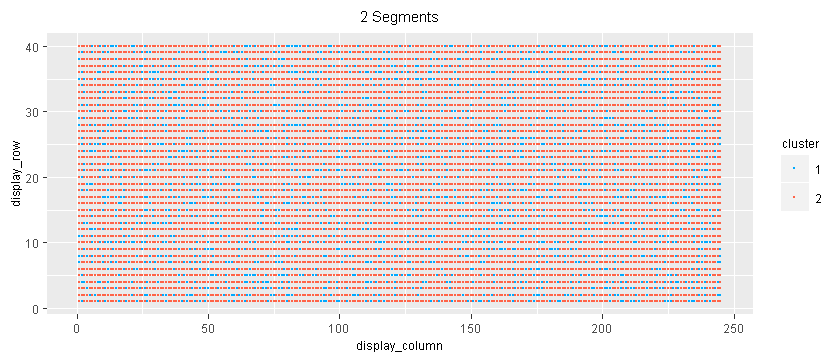

In [9]:
d = data.frame(display_row=sort(rep(1:40, length.out=length(cluster.2))), display_column=rep(1:(length(cluster.2)%/%40), length.out=length(cluster.2)), cluster=factor(cluster.2, sort(unique(cluster.2))))

data.frame(size_cluster_1=length(which(cluster.2==1)),
           size_cluster_2=length(which(cluster.2==2)))

ggplot(d) + ggtitle("2 Segments") +
geom_point(aes(x=display_column, y=display_row, color=cluster), size=0.1) +
scale_color_manual(values=PALETTE) + theme.legend_title

size_cluster_1,size_cluster_2,size_cluster_3
2866,6263,684


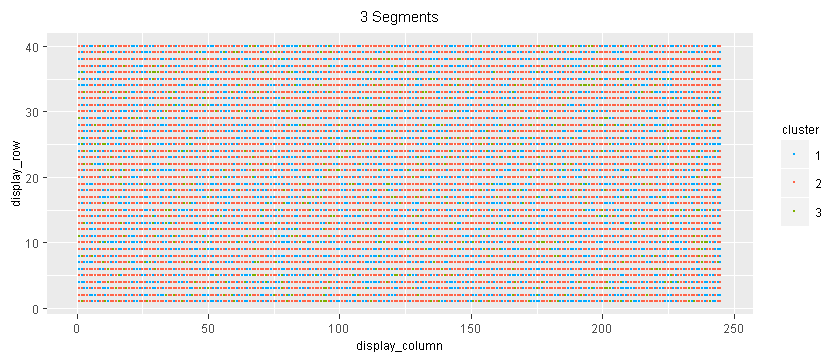

In [10]:
d = data.frame(display_row=sort(rep(1:40, length.out=length(cluster.3))), display_column=rep(1:(length(cluster.3)%/%40), length.out=length(cluster.3)), cluster=factor(cluster.3, sort(unique(cluster.3))))

data.frame(size_cluster_1=length(which(cluster.3==1)),
           size_cluster_2=length(which(cluster.3==2)),
           size_cluster_3=length(which(cluster.3==3)))

ggplot(d) + ggtitle("3 Segments") +
geom_point(aes(x=display_column, y=display_row, color=cluster), size=0.1) +
scale_color_manual(values=PALETTE) + theme.legend_title

size_cluster_1,size_cluster_2,size_cluster_3,size_cluster_4
2049,6028,603,1133


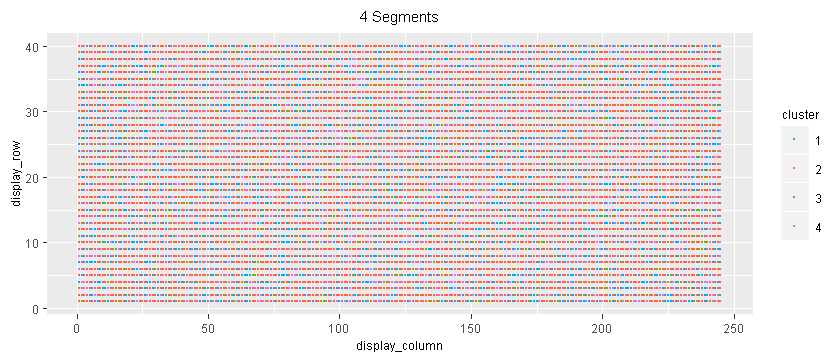

In [11]:
d = data.frame(display_row=sort(rep(1:40, length.out=length(cluster.4))), display_column=rep(1:(length(cluster.4)%/%40), length.out=length(cluster.4)), cluster=factor(cluster.4, sort(unique(cluster.4))))

data.frame(size_cluster_1=length(which(cluster.4==1)),
           size_cluster_2=length(which(cluster.4==2)),
           size_cluster_3=length(which(cluster.4==3)),
           size_cluster_4=length(which(cluster.4==4)))

ggplot(d) + ggtitle("4 Segments") +
geom_point(aes(x=display_column, y=display_row, color=cluster), size=0.1) +
scale_color_manual(values=PALETTE) + theme.legend_title

## Evaluation of Segmentation Models

**Evaluate the 2-segment market segmentation model by dispersion ratio.**

In [12]:
datax.2.1 = datax.norm[cluster.2==1,]
datax.2.2 = datax.norm[cluster.2==2,]

In [13]:
intracluster_dispersion.2.1 = mean(dist(datax.2.1))
cluster_size.2.1 = nrow(datax.2.1)
cluster_centroid.2.1 = as.data.frame(t(colMeans(datax.2.1)))

data.frame(cluster_size.2.1, intracluster_dispersion.2.1)
cluster_centroid.2.1

cluster_size.2.1,intracluster_dispersion.2.1
2097,20.4465


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
0.32884,0.1761682,-0.3745279,-0.0134671,0.1334286,0.04471321,0.02651748,-0.02041934,-0.02879377,-0.1562945,0.1472055,-0.08917007,0.06022246,0.00646001,-0.1378563,-0.01375317,-0.07335026,0.598911,1.324283,1.205736,1.080047,0.7377811,0.9183775,1.28628,1.23187,1.221828,1.045112,0.9260667,0.8890326,0.1418641,0.7762315,0.7609473,0.161183,0.3050146,0.07474515,0.4385436,0.309895,...,-0.03643774,-0.003428571,0.0243714,-0.06811411,-0.01382653,-0.008284955,0.01211963,-0.008722581,0.01607742,-0.04261048,0.04244338,-0.04352653,-0.01277636,-0.009821187,-0.01219649,-0.03879069,0.007785874,-0.01146949,-0.001870825,-0.07354699,0.08819441,-0.04351967,0.08783978,-0.01642484,-2.037115e-15,-0.01893185,-1.694189e-18,-0.0628127,-0.0424493,-0.0009233808,0.006097671,-0.04209781,-0.002717804,-0.02367424,0.0102852,-0.02283751,0.01058324


In [14]:
intracluster_dispersion.2.2 = mean(dist(datax.2.2))
cluster_size.2.2 = nrow(datax.2.2)
cluster_centroid.2.2 = as.data.frame(t(colMeans(datax.2.2)))

data.frame(cluster_size.2.2, intracluster_dispersion.2.2)
cluster_centroid.2.2

cluster_size.2.2,intracluster_dispersion.2.2
7716,12.8746


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
-0.08936981,-0.04787776,0.1017865,0.003659994,-0.03626229,-0.01215184,-0.007206733,0.005549424,0.007825368,0.04247662,-0.04000648,0.02423401,-0.01636684,-0.001755656,0.0374656,0.003737739,0.01993462,-0.1627678,-0.3599043,-0.3276864,-0.2935276,-0.2005089,-0.2495901,-0.3495761,-0.3347889,-0.3320597,-0.2840331,-0.2516799,-0.241615,-0.03855484,-0.2109587,-0.2068049,-0.04380518,-0.08289472,-0.02031371,-0.1191843,-0.08422109,...,0.00990279,0.0009317928,-0.006623487,0.01851157,0.003757677,0.002251626,-0.003293789,0.002370561,-0.004369407,0.01158038,-0.01153496,0.01182933,0.003472269,0.002669133,0.003314675,0.01054226,-0.00211599,0.003117096,0.0005084397,0.01998808,-0.02396885,0.01182747,-0.02387248,0.004463828,-2.034896e-15,0.005145164,-4.604346e-19,0.01707079,0.01153657,0.0002509499,-0.001657182,0.01144104,0.0007386257,0.006434017,-0.002795238,0.006206618,-0.002876238


In [15]:
mean_intracluster_dispersion.2 = mean(c(intracluster_dispersion.2.1, intracluster_dispersion.2.2))
mean_intercluster_dispersion.2 = mean(dist(rbind(cluster_centroid.2.1, cluster_centroid.2.2)))
quality.2 = mean_intercluster_dispersion.2 / mean_intracluster_dispersion.2
data.frame(mean_intercluster_dispersion.2, mean_intracluster_dispersion.2, quality.2)

mean_intercluster_dispersion.2,mean_intracluster_dispersion.2,quality.2
9.052272,16.66055,0.5433357


**Evaluate the 3-segment market segmentation model by dispersion ratio.**

In [16]:
datax.3.1 = datax.norm[cluster.3==1,]
datax.3.2 = datax.norm[cluster.3==2,]
datax.3.3 = datax.norm[cluster.3==3,]

In [17]:
intracluster_dispersion.3.1 = mean(dist(datax.3.1))
cluster_size.3.1 = nrow(datax.3.1)
cluster_centroid.3.1 = as.data.frame(t(colMeans(datax.3.1)))

data.frame(cluster_size.3.1, intracluster_dispersion.3.1)
cluster_centroid.3.1

cluster_size.3.1,intracluster_dispersion.3.1
2866,16.26149


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
0.31399,0.1850478,-0.3745279,-0.01048378,0.1334286,0.02880739,0.001415105,-0.01419659,-0.04043088,-0.1257706,0.05931001,-0.09086551,0.04580134,-0.006959658,-0.1339237,-0.01302101,-0.09548087,0.4047693,0.5376201,0.4873692,0.4626932,0.3132333,0.427029,0.5095991,0.494395,0.4746038,0.4152377,0.3698604,0.2889582,-0.03136949,0.3019961,0.3330099,0.11691,0.1708379,0.06568553,0.1981176,0.1612434,...,-0.00741314,0.03652445,-0.009956512,-0.02320575,-0.007114419,-0.00266185,0.0005216303,-0.009982076,-0.0114848,-0.02123479,0.01480402,0.004761481,-0.04133571,0.02376992,-0.01784789,-0.0183664,-0.003184355,0.02798521,-0.0009955263,-0.076682,0.007804561,0.003535448,0.01300808,0.02523532,0.02020804,0.007107634,-0.02033467,-0.02999191,-0.0005066783,-0.01234071,0.02387782,-0.02098019,-0.000662856,-0.0121217,-0.03413273,-0.008628664,-0.01042568


In [18]:
intracluster_dispersion.3.2 = mean(dist(datax.3.2)) # may take about 1 minute
cluster_size.3.2 = nrow(datax.3.2)
cluster_centroid.3.2 = as.data.frame(t(colMeans(datax.3.2)))

data.frame(cluster_size.3.2, intracluster_dispersion.3.2)
cluster_centroid.3.2

cluster_size.3.2,intracluster_dispersion.3.2
6263,12.17165


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
-0.1727031,-0.09278391,0.2122903,0.008928479,-0.07563015,-0.01105132,-0.006041571,0.007885221,0.0187781,0.07986327,-0.05517469,0.0538557,-0.0361208,-0.002629737,0.07732407,0.00978851,0.04859918,-0.2730166,-0.4973534,-0.4535104,-0.411543,-0.2799511,-0.3625021,-0.4772684,-0.4550617,-0.452154,-0.3908628,-0.3426485,-0.3140689,-0.0309552,-0.2795874,-0.2843516,-0.07536835,-0.1237843,-0.04374668,-0.1672479,-0.1278048,...,0.01243041,-0.0089623,-0.007600119,0.0185864,0.008123141,0.0008776848,-0.0008933253,0.008716593,0.003393138,0.01343742,-0.01161333,0.01042408,0.01315359,0.002426106,0.01225101,0.01191488,-0.005534637,-0.01060143,0.002676421,0.03969622,-0.02183538,0.005520446,-0.02690847,0.00230537,0.001946814,-0.002792057,-5.672543e-19,0.02484978,0.007489083,0.01237976,-0.01186069,0.01432597,0.006066566,0.008237557,0.008249646,0.002311961,-0.003296361


In [19]:
intracluster_dispersion.3.3 = mean(dist(datax.3.3))
cluster_size.3.3 = nrow(datax.3.3)
cluster_centroid.3.3 = as.data.frame(t(colMeans(datax.3.3)))

data.frame(cluster_size.3.3, intracluster_dispersion.3.3)
cluster_centroid.3.3

cluster_size.3.3,intracluster_dispersion.3.3
684,24.75406


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
0.2657078,0.07420838,-0.3745279,-0.03782538,0.1334286,-0.01951401,0.04938987,-0.01271596,-0.002532693,-0.2042764,0.256691,-0.1123943,0.1388274,0.05324038,-0.1468646,-0.03506905,-0.04492469,0.803851,2.301323,2.110432,1.829554,1.250888,1.529949,2.234826,2.095198,2.1515,1.839039,1.587701,1.664999,0.4148792,1.294642,1.208315,0.2002456,0.4176021,0.1253374,0.7012702,0.4946166,...,-0.08275668,-0.07097689,0.1113083,-0.07295169,-0.04456917,0.003116844,0.005994011,-0.03798742,0.01705293,-0.03406382,0.04430694,-0.1153983,0.05275909,-0.1218119,-0.03739186,-0.03214145,0.06402017,-0.0201884,-0.02033515,-0.04217372,0.1672326,-0.06536132,0.191881,-0.1268464,-0.1024987,-0.004216123,0.08520346,-0.1018675,-0.06645027,-0.06164612,0.008552175,-0.04326656,-0.0527707,-0.02463602,0.06748082,0.0149853,0.07386712


In [20]:
mean_intracluster_dispersion.3 = mean(c(intracluster_dispersion.3.1, intracluster_dispersion.3.2, intracluster_dispersion.3.3))
mean_intercluster_dispersion.3 = mean(dist(rbind(cluster_centroid.3.1, cluster_centroid.3.2, cluster_centroid.3.3)))
quality.3 = mean_intercluster_dispersion.3 / mean_intracluster_dispersion.3
data.frame(mean_intercluster_dispersion.3, mean_intracluster_dispersion.3, quality.3)

mean_intercluster_dispersion.3,mean_intracluster_dispersion.3,quality.3
9.986895,17.72906,0.5633064


**Evaluate the 4-segment market segmentation model by dispersion ratio.**

In [21]:
datax.4.1 = datax.norm[cluster.4==1,]
datax.4.2 = datax.norm[cluster.4==2,]
datax.4.3 = datax.norm[cluster.4==3,]
datax.4.4 = datax.norm[cluster.4==4,]

In [22]:
intracluster_dispersion.4.1 = mean(dist(datax.4.1))
cluster_size.4.1 = nrow(datax.4.1)
cluster_centroid.4.1 = as.data.frame(t(colMeans(datax.4.1)))

data.frame(cluster_size.4.1, intracluster_dispersion.4.1)
cluster_centroid.4.1

cluster_size.4.1,intracluster_dispersion.4.1
2049,14.04676


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
0.2364222,0.09328622,-0.3745279,-0.01792545,0.1334286,-0.001317069,0.00640167,-0.01615808,-0.09950046,-0.08494313,-0.06948144,-0.09518269,0.05982383,-0.009279875,-0.1356307,0.01649206,-0.03924221,0.2525452,0.6809217,0.4868996,0.5761048,0.461043,0.2582126,0.7457136,0.8364378,0.6587687,0.5211182,0.4421884,0.2239463,-0.0868144,0.4367658,0.2125496,-0.1213141,-0.1513455,-0.03088259,0.161067,-0.1024585,...,-0.01405368,0.01104038,-0.04903499,0.03853803,-0.02337139,0.02373442,-0.02759292,0.009170662,-0.01855954,0.04128891,-0.0165032,0.0003553118,-0.04865569,-0.002987549,-0.0187233,-0.0156546,0.000449492,0.05023348,0.01183603,0.1077435,-0.07425622,0.08393849,-0.009901487,0.08991259,-0.008925984,0.004924518,-0.01896182,0.02592305,0.01481197,0.05904673,0.008180383,0.03982154,-0.007019905,0.04019893,-0.07688553,0.03252334,-0.01708949


In [23]:
intracluster_dispersion.4.2 = mean(dist(datax.4.2)) # may take about 1 minute
cluster_size.4.2 = nrow(datax.4.2)
cluster_centroid.4.2 = as.data.frame(t(colMeans(datax.4.2)))

data.frame(cluster_size.4.2, intracluster_dispersion.4.2)
cluster_centroid.4.2

cluster_size.4.2,intracluster_dispersion.4.2
6028,11.578


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
-0.1994469,-0.1059942,0.2350356,0.004575389,-0.08375812,-0.01221137,-0.001917316,0.01074825,0.009335598,0.08854862,-0.06785079,0.05785911,-0.03818255,-0.003027808,0.08328932,0.008116071,0.06205345,-0.2961341,-0.5014346,-0.4670502,-0.4111924,-0.2742522,-0.3804416,-0.4777144,-0.4525821,-0.4535714,-0.3931217,-0.3474523,-0.3257589,-0.03589093,-0.2741498,-0.3005211,-0.09407009,-0.1538619,-0.05593173,-0.1700423,-0.1571352,...,-0.01159958,-0.01231567,-0.01620288,0.03882185,-0.004188143,0.01575597,-0.01205094,0.0206777,-0.002968773,0.02125335,-0.01079596,0.004190624,0.01040096,0.005077544,0.01060718,0.01147867,-0.002958541,-0.006405933,-0.003254081,0.0638077,-0.03336732,0.01916537,-0.02808173,0.02487889,0.007585161,0.0002996382,0.003222692,0.04201785,-0.007540143,0.0210704,-0.01555781,0.02110351,0.0117057,0.01606854,-0.01129828,0.0003107517,-0.01236493


In [24]:
intracluster_dispersion.4.3 = mean(dist(datax.4.3))
cluster_size.4.3 = nrow(datax.4.3)
cluster_centroid.4.3 = as.data.frame(t(colMeans(datax.4.3)))

data.frame(cluster_size.4.3, intracluster_dispersion.4.3)
cluster_centroid.4.3

cluster_size.4.3,intracluster_dispersion.4.3
603,24.9037


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
0.2285685,0.05509949,-0.3745279,-0.04424985,0.1334286,-0.03900345,0.04428038,-0.04201849,0.005513271,-0.2007436,0.2557757,-0.1060556,0.1579551,0.08185981,-0.1500693,-0.03181908,-0.0236631,0.7957859,2.425144,2.210527,1.934971,1.337668,1.556967,2.334889,2.184539,2.25527,1.918322,1.674646,1.750348,0.4451355,1.378906,1.236489,0.1843101,0.3660725,0.1236386,0.7462761,0.4343763,...,-0.106268,-0.07776052,0.1275859,-0.04436481,-0.01883362,-0.00340207,0.01523241,-0.01876658,0.03100279,-0.05545574,0.05025861,-0.100828,0.01178787,-0.144071,-0.04241464,-0.0161315,0.07303645,-0.03299294,-0.02306674,-0.001333017,0.152524,-0.03093408,0.1323233,-0.05330018,-0.08593665,-0.01016401,0.0966487,-0.06543188,-0.05081286,-0.05420798,0.02350621,-0.02623833,-0.0418565,-0.03130944,0.06372267,0.004797382,0.07701211


In [25]:
intracluster_dispersion.4.4 = mean(dist(datax.4.4))
cluster_size.4.4 = nrow(datax.4.4)
cluster_centroid.4.4 = as.data.frame(t(colMeans(datax.4.4)))

data.frame(cluster_size.4.4, intracluster_dispersion.4.4)
cluster_centroid.4.4

cluster_size.4.4,intracluster_dispersion.4.4
1133,21.82738


WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ
0.5119242,0.3658998,-0.3738276,0.0316253,0.1333109,0.08810937,-0.02494308,-0.005600521,0.1273406,-0.2106568,0.3505201,-0.07925317,0.01089007,-0.01067553,-0.1179779,-0.05607149,-0.2465861,0.6952977,0.1456996,0.4278675,0.116012,-0.08658307,0.7284849,-0.04964082,-0.2674081,0.02152117,0.1281713,0.1576229,0.3966008,0.1110472,-0.06517052,0.5564204,0.6217901,0.8974797,0.2876265,0.216226,0.790132,...,0.1436875,0.08694326,0.1069809,-0.2526307,0.07457262,-0.1249403,0.1059098,-0.1166104,0.0328593,-0.1582316,0.06053587,0.0307239,0.02638166,0.05506518,-8.518529e-15,-0.02417465,-0.02394343,-0.03920449,0.008184316,-0.5336235,0.2306419,-0.2373041,0.09688777,-0.2666027,0.0215232,-0.005090605,-0.03429195,-0.2356085,0.04037283,-0.1900368,0.05546923,-0.1703306,-0.02730689,-0.1415262,0.1652425,-0.06302415,0.0557051


In [26]:
mean_intracluster_dispersion.4 = mean(c(intracluster_dispersion.4.1, intracluster_dispersion.4.2, intracluster_dispersion.4.3, intracluster_dispersion.4.4))
mean_intercluster_dispersion.4 = mean(dist(rbind(cluster_centroid.4.1, cluster_centroid.4.2, cluster_centroid.4.3, cluster_centroid.4.4)))
quality.4 = mean_intercluster_dispersion.4 / mean_intracluster_dispersion.4
data.frame(mean_intercluster_dispersion.4, mean_intracluster_dispersion.4, quality.4)

mean_intercluster_dispersion.4,mean_intracluster_dispersion.4,quality.4
8.975184,18.08896,0.4961692


**Compare segmentation model quality.**

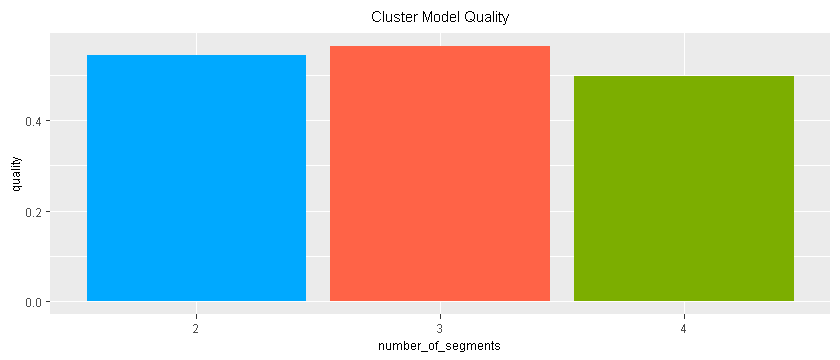

In [27]:
d = data.frame(number_of_segments=factor(2:4), quality=c(quality.2, quality.3, quality.4))

ggplot(d) + ggtitle("Cluster Model Quality") +
geom_col(aes(x=number_of_segments, y=quality, fill=number_of_segments)) +
theme.no_legend

## Business Value

**Business value of 2-segment market segmentation model.**

In [28]:
potential_market_share.2.1 = cluster_size.2.1 / nrow(data.2)
market_share.2.1 = potential_market_share.2.1 * (1/intracluster_dispersion.2.1) * calibration
volume.2.1 = market_size * market_share.2.1
revenue.2.1 = volume.2.1 * price
cost.2.1 = cost.fixed + (cost.variable * volume.2.1)
profit.2.1 = revenue.2.1 - cost.2.1

potential_market_share.2.2 = cluster_size.2.2 / nrow(data.2)
market_share.2.2 = potential_market_share.2.2 * (1/intracluster_dispersion.2.2) * calibration
volume.2.2 = market_size * market_share.2.2
revenue.2.2 = volume.2.2 * price
cost.2.2 = cost.fixed + (cost.variable * volume.2.2)
profit.2.2 = revenue.2.2 - cost.2.2

profit.2 = profit.2.1 + profit.2.2

report = data.frame(cluster=1:2,
                    market_size,
                    potential_market_share=c(potential_market_share.2.1, potential_market_share.2.2),
                    intracluster_dispersion=c(intracluster_dispersion.2.1, intracluster_dispersion.2.2),
                    market_share=c(market_share.2.1, market_share.2.2),
                    volume=c(volume.2.1, volume.2.2),
                    price,
                    revenue=c(revenue.2.1, revenue.2.2),
                    cost.fixed,
                    cost.variable,
                    cost=c(cost.2.1, cost.2.2),
                    profit=c(profit.2.1, profit.2.2))

report.2 = data.frame(number_of_clusters=2, total_profit=profit.2)

report
report.2

cluster,market_size,potential_market_share,intracluster_dispersion,market_share,volume,price,revenue,cost.fixed,cost.variable,cost,profit
1,100000,0.2136961,20.4465,0.002612869,261.2869,999.99,261284.3,150000,100,176128.7,85155.6
2,100000,0.7863039,12.8746,0.015268506,1526.8506,999.99,1526835.3,150000,100,302685.1,1224150.3


number_of_clusters,total_profit
2,1309306


**Business value of 3-segment market segmentation model.**

In [29]:
potential_market_share.3.1 = cluster_size.3.1 / nrow(data.3)
market_share.3.1 = potential_market_share.3.1 * (1/intracluster_dispersion.3.1) * calibration
volume.3.1 = market_size * market_share.3.1
revenue.3.1 = volume.3.1 * price
cost.3.1 = cost.fixed + (cost.variable * volume.3.1)
profit.3.1 = revenue.3.1 - cost.3.1

potential_market_share.3.2 = cluster_size.3.2 / nrow(data.3)
market_share.3.2 = potential_market_share.3.2 * (1/intracluster_dispersion.3.2) * calibration
volume.3.2 = market_size * market_share.3.2
revenue.3.2 = volume.3.2 * price
cost.3.2 = cost.fixed + (cost.variable * volume.3.2)
profit.3.2 = revenue.3.2 - cost.3.2

potential_market_share.3.3 = cluster_size.3.3 / nrow(data.3)
market_share.3.3 = potential_market_share.3.3 * (1/intracluster_dispersion.3.3) * calibration
volume.3.3 = market_size * market_share.3.3
revenue.3.3 = volume.3.3 * price
cost.3.3 = cost.fixed + (cost.variable * volume.3.3)
profit.3.3 = revenue.3.3 - cost.3.3

profit.3 = profit.3.1 + profit.3.2 + profit.3.3

report = data.frame(cluster=1:3,
                    market_size,
                    potential_market_share=c(potential_market_share.3.1, potential_market_share.3.2, potential_market_share.3.3),
                    intracluster_dispersion=c(intracluster_dispersion.3.1, intracluster_dispersion.3.2, intracluster_dispersion.3.3),
                    market_share=c(market_share.3.1, market_share.3.2, market_share.3.3),
                    volume=c(volume.3.1, volume.3.2, volume.3.3),
                    price,
                    revenue=c(revenue.3.1, revenue.3.2, revenue.3.3),
                    cost.fixed,
                    cost.variable,
                    cost=c(cost.3.1, cost.3.2, cost.3.3),
                    profit=c(profit.3.1, profit.3.2, profit.3.3))

report.3 = data.frame(number_of_clusters=3, total_profit=profit.3)

report
report.3

cluster,market_size,potential_market_share,intracluster_dispersion,market_share,volume,price,revenue,cost.fixed,cost.variable,cost,profit
1,100000,0.29206155,16.26149,0.0044900809,449.00809,999.99,449003.60,150000,100,194900.8,254102.79
2,100000,0.63823499,12.17165,0.0131090526,1310.90526,999.99,1310892.16,150000,100,281090.5,1029801.63
3,100000,0.06970345,24.75406,0.0007039599,70.39599,999.99,70395.29,150000,100,157039.6,-86644.31


number_of_clusters,total_profit
3,1197260


**Business value of 4-segment market segmentation model.**

In [30]:
potential_market_share.4.1 = cluster_size.4.1 / nrow(data.4)
market_share.4.1 = potential_market_share.4.1 * (1/intracluster_dispersion.4.1) * calibration
volume.4.1 = market_size * market_share.4.1
revenue.4.1 = volume.4.1 * price
cost.4.1 = cost.fixed + (cost.variable * volume.4.1)
profit.4.1 = revenue.4.1 - cost.4.1

potential_market_share.4.2 = cluster_size.4.2 / nrow(data.4)
market_share.4.2 = potential_market_share.4.2 * (1/intracluster_dispersion.4.2) * calibration
volume.4.2 = market_size * market_share.4.2
revenue.4.2 = volume.4.2 * price
cost.4.2 = cost.fixed + (cost.variable * volume.4.2)
profit.4.2 = revenue.4.2 - cost.4.2

potential_market_share.4.3 = cluster_size.4.3 / nrow(data.4)
market_share.4.3 = potential_market_share.4.3 * (1/intracluster_dispersion.4.3) * calibration
volume.4.3 = market_size * market_share.4.3
revenue.4.3 = volume.4.3 * price
cost.4.3 = cost.fixed + (cost.variable * volume.4.3)
profit.4.3 = revenue.4.3 - cost.4.3

potential_market_share.4.4 = cluster_size.4.4 / nrow(data.4)
market_share.4.4 = potential_market_share.4.4 * (1/intracluster_dispersion.4.4) * calibration
volume.4.4 = market_size * market_share.4.4
revenue.4.4 = volume.4.4 * price
cost.4.4 = cost.fixed + (cost.variable * volume.4.4)
profit.4.4 = revenue.4.4 - cost.4.4

profit.4 = profit.4.1 + profit.4.2 + profit.4.3 + profit.4.4

report = data.frame(cluster=1:4,
                    market_size,
                    potential_market_share=c(potential_market_share.4.1, potential_market_share.4.2, potential_market_share.4.3, potential_market_share.4.4),
                    intracluster_dispersion=c(intracluster_dispersion.4.1, intracluster_dispersion.4.2, intracluster_dispersion.4.3, intracluster_dispersion.4.4),
                    market_share=c(market_share.4.1, market_share.4.2, market_share.4.3, market_share.4.4),
                    volume=c(volume.4.1, volume.4.2, volume.4.3, volume.4.4),
                    price,
                    revenue=c(revenue.4.1, revenue.4.2, revenue.4.3, revenue.4.4),
                    cost.fixed,
                    cost.variable,
                    cost=c(cost.4.1, cost.4.2, cost.4.3, cost.4.4),
                    profit=c(profit.4.1, profit.4.2, profit.4.3, profit.4.4))

report.4 = data.frame(number_of_clusters=4, total_profit=profit.4)

report
report.4

cluster,market_size,potential_market_share,intracluster_dispersion,market_share,volume,price,revenue,cost.fixed,cost.variable,cost,profit
1,100000,0.2088046,14.04676,0.0037162429,371.62429,999.99,371620.6,150000,100,187162.4,184458.14
2,100000,0.6142872,11.57800,0.0132641026,1326.41026,999.99,1326397.0,150000,100,282641.0,1043755.97
3,100000,0.0614491,24.90370,0.0006168672,61.68672,999.99,61686.1,150000,100,156168.7,-94482.57
4,100000,0.1154591,21.82738,0.0013224112,132.24112,999.99,132239.8,150000,100,163224.1,-30984.31


number_of_clusters,total_profit
4,1102747


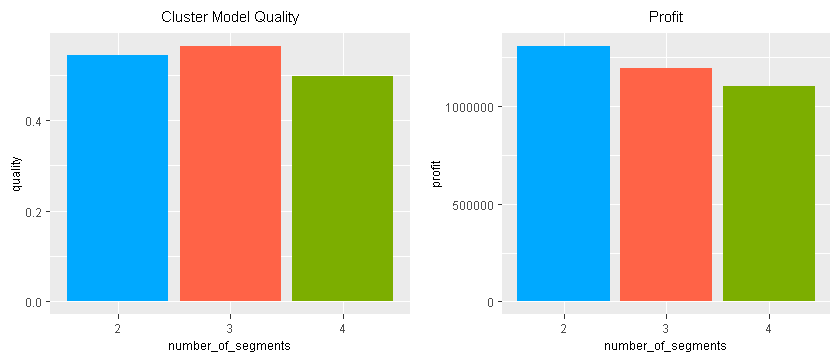

In [31]:
d = data.frame(number_of_segments=factor(2:4),
               quality=c(quality.2, quality.3, quality.4),
               profit=c(profit.2, profit.3, profit.4))

p1 = ggplot(d) + ggtitle("Cluster Model Quality") +
     geom_col(aes(x=number_of_segments, y=quality, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

p2 = ggplot(d) + ggtitle("Profit") +
     geom_col(aes(x=number_of_segments, y=profit, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

grid.arrange(p1, p2, nrow=1)

## Sensitivity Analysis

Analyze effect of changes in business parameter values on business value.

In [32]:
# market_size = 100000; calibration = 0.25; price = 999.99; cost.fixed = 150000; cost.variable = 100
# market_size = 100000; calibration = 0.25; price = 999.99; cost.fixed =  40000; cost.variable = 100
# market_size = 100000; calibration = 0.25; price = 999.99; cost.fixed = 300000; cost.variable = 100
# market_size = 100000; calibration = 0.50; price = 999.99; cost.fixed = 150000; cost.variable = 100
# market_size = 100000; calibration = 0.10; price = 999.99; cost.fixed = 150000; cost.variable = 100

In [33]:
market_size = 100000; calibration = 0.25; price = 999.99; cost.fixed =  40000; cost.variable = 100

In [34]:
potential_market_share.2.1 = cluster_size.2.1 / nrow(data.2)
market_share.2.1 = potential_market_share.2.1 * (1/intracluster_dispersion.2.1) * calibration
volume.2.1 = market_size * market_share.2.1
revenue.2.1 = volume.2.1 * price
cost.2.1 = cost.fixed + (cost.variable * volume.2.1)
profit.2.1 = revenue.2.1 - cost.2.1

potential_market_share.2.2 = cluster_size.2.2 / nrow(data.2)
market_share.2.2 = potential_market_share.2.2 * (1/intracluster_dispersion.2.2) * calibration
volume.2.2 = market_size * market_share.2.2
revenue.2.2 = volume.2.2 * price
cost.2.2 = cost.fixed + (cost.variable * volume.2.2)
profit.2.2 = revenue.2.2 - cost.2.2

profit.2 = profit.2.1 + profit.2.2



potential_market_share.3.1 = cluster_size.3.1 / nrow(data.3)
market_share.3.1 = potential_market_share.3.1 * (1/intracluster_dispersion.3.1) * calibration
volume.3.1 = market_size * market_share.3.1
revenue.3.1 = volume.3.1 * price
cost.3.1 = cost.fixed + (cost.variable * volume.3.1)
profit.3.1 = revenue.3.1 - cost.3.1

potential_market_share.3.2 = cluster_size.3.2 / nrow(data.3)
market_share.3.2 = potential_market_share.3.2 * (1/intracluster_dispersion.3.2) * calibration
volume.3.2 = market_size * market_share.3.2
revenue.3.2 = volume.3.2 * price
cost.3.2 = cost.fixed + (cost.variable * volume.3.2)
profit.3.2 = revenue.3.2 - cost.3.2

potential_market_share.3.3 = cluster_size.3.3 / nrow(data.3)
market_share.3.3 = potential_market_share.3.3 * (1/intracluster_dispersion.3.3) * calibration
volume.3.3 = market_size * market_share.3.3
revenue.3.3 = volume.3.3 * price
cost.3.3 = cost.fixed + (cost.variable * volume.3.3)
profit.3.3 = revenue.3.3 - cost.3.3

profit.3 = profit.3.1 + profit.3.2 + profit.3.3



potential_market_share.4.1 = cluster_size.4.1 / nrow(data.4)
market_share.4.1 = potential_market_share.4.1 * (1/intracluster_dispersion.4.1) * calibration
volume.4.1 = market_size * market_share.4.1
revenue.4.1 = volume.4.1 * price
cost.4.1 = cost.fixed + (cost.variable * volume.4.1)
profit.4.1 = revenue.4.1 - cost.4.1

potential_market_share.4.2 = cluster_size.4.2 / nrow(data.4)
market_share.4.2 = potential_market_share.4.2 * (1/intracluster_dispersion.4.2) * calibration
volume.4.2 = market_size * market_share.4.2
revenue.4.2 = volume.4.2 * price
cost.4.2 = cost.fixed + (cost.variable * volume.4.2)
profit.4.2 = revenue.4.2 - cost.4.2

potential_market_share.4.3 = cluster_size.4.3 / nrow(data.4)
market_share.4.3 = potential_market_share.4.3 * (1/intracluster_dispersion.4.3) * calibration
volume.4.3 = market_size * market_share.4.3
revenue.4.3 = volume.4.3 * price
cost.4.3 = cost.fixed + (cost.variable * volume.4.3)
profit.4.3 = revenue.4.3 - cost.4.3

potential_market_share.4.4 = cluster_size.4.4 / nrow(data.4)
market_share.4.4 = potential_market_share.4.4 * (1/intracluster_dispersion.4.4) * calibration
volume.4.4 = market_size * market_share.4.4
revenue.4.4 = volume.4.4 * price
cost.4.4 = cost.fixed + (cost.variable * volume.4.4)
profit.4.4 = revenue.4.4 - cost.4.4

profit.4 = profit.4.1 + profit.4.2 + profit.4.3 + profit.4.4

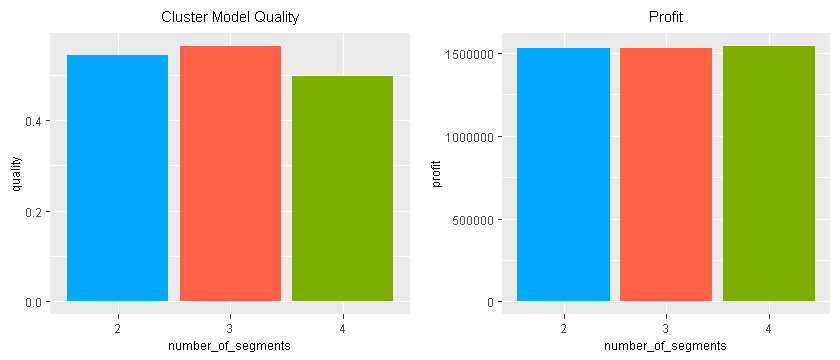

In [35]:
potential_market_share.2.1 = cluster_size.2.1 / nrow(data.2)
market_share.2.1 = potential_market_share.2.1 * (1/intracluster_dispersion.2.1) * calibration
volume.2.1 = market_size * market_share.2.1
revenue.2.1 = volume.2.1 * price
cost.2.1 = cost.fixed + (cost.variable * volume.2.1)
profit.2.1 = revenue.2.1 - cost.2.1

potential_market_share.2.2 = cluster_size.2.2 / nrow(data.2)
market_share.2.2 = potential_market_share.2.2 * (1/intracluster_dispersion.2.2) * calibration
volume.2.2 = market_size * market_share.2.2
revenue.2.2 = volume.2.2 * price
cost.2.2 = cost.fixed + (cost.variable * volume.2.2)
profit.2.2 = revenue.2.2 - cost.2.2

profit.2 = profit.2.1 + profit.2.2


potential_market_share.3.1 = cluster_size.3.1 / nrow(data.3)
market_share.3.1 = potential_market_share.3.1 * (1/intracluster_dispersion.3.1) * calibration
volume.3.1 = market_size * market_share.3.1
revenue.3.1 = volume.3.1 * price
cost.3.1 = cost.fixed + (cost.variable * volume.3.1)
profit.3.1 = revenue.3.1 - cost.3.1

potential_market_share.3.2 = cluster_size.3.2 / nrow(data.3)
market_share.3.2 = potential_market_share.3.2 * (1/intracluster_dispersion.3.2) * calibration
volume.3.2 = market_size * market_share.3.2
revenue.3.2 = volume.3.2 * price
cost.3.2 = cost.fixed + (cost.variable * volume.3.2)
profit.3.2 = revenue.3.2 - cost.3.2

potential_market_share.3.3 = cluster_size.3.3 / nrow(data.3)
market_share.3.3 = potential_market_share.3.3 * (1/intracluster_dispersion.3.3) * calibration
volume.3.3 = market_size * market_share.3.3
revenue.3.3 = volume.3.3 * price
cost.3.3 = cost.fixed + (cost.variable * volume.3.3)
profit.3.3 = revenue.3.3 - cost.3.3

profit.3 = profit.3.1 + profit.3.2 + profit.3.3


potential_market_share.4.1 = cluster_size.4.1 / nrow(data.4)
market_share.4.1 = potential_market_share.4.1 * (1/intracluster_dispersion.4.1) * calibration
volume.4.1 = market_size * market_share.4.1
revenue.4.1 = volume.4.1 * price
cost.4.1 = cost.fixed + (cost.variable * volume.4.1)
profit.4.1 = revenue.4.1 - cost.4.1

potential_market_share.4.2 = cluster_size.4.2 / nrow(data.4)
market_share.4.2 = potential_market_share.4.2 * (1/intracluster_dispersion.4.2) * calibration
volume.4.2 = market_size * market_share.4.2
revenue.4.2 = volume.4.2 * price
cost.4.2 = cost.fixed + (cost.variable * volume.4.2)
profit.4.2 = revenue.4.2 - cost.4.2

potential_market_share.4.3 = cluster_size.4.3 / nrow(data.4)
market_share.4.3 = potential_market_share.4.3 * (1/intracluster_dispersion.4.3) * calibration
volume.4.3 = market_size * market_share.4.3
revenue.4.3 = volume.4.3 * price
cost.4.3 = cost.fixed + (cost.variable * volume.4.3)
profit.4.3 = revenue.4.3 - cost.4.3

potential_market_share.4.4 = cluster_size.4.4 / nrow(data.4)
market_share.4.4 = potential_market_share.4.4 * (1/intracluster_dispersion.4.4) * calibration
volume.4.4 = market_size * market_share.4.4
revenue.4.4 = volume.4.4 * price
cost.4.4 = cost.fixed + (cost.variable * volume.4.4)
profit.4.4 = revenue.4.4 - cost.4.4

profit.4 = profit.4.1 + profit.4.2 + profit.4.3 + profit.4.4


d = data.frame(number_of_segments=factor(2:4),
               quality=c(quality.2, quality.3, quality.4),
               profit=c(profit.2, profit.3, profit.4))

p1 = ggplot(d) + ggtitle("Cluster Model Quality") +
     geom_col(aes(x=number_of_segments, y=quality, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

p2 = ggplot(d) + ggtitle("Profit") +
     geom_col(aes(x=number_of_segments, y=profit, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

grid.arrange(p1, p2, nrow=1)

In [36]:
market_size = 100000; calibration = 0.25; price = 999.99; cost.fixed = 300000; cost.variable = 100

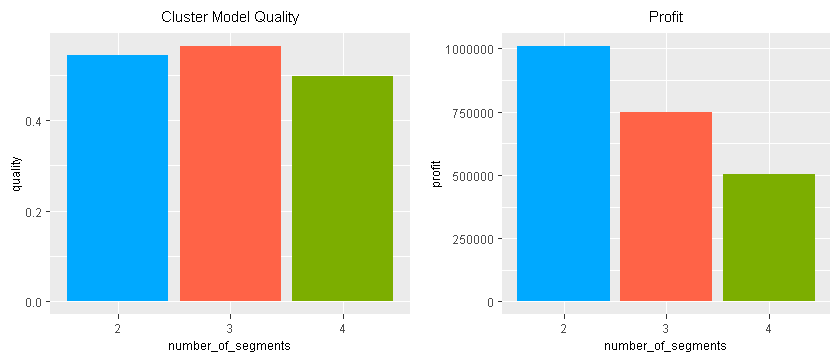

In [37]:
potential_market_share.2.1 = cluster_size.2.1 / nrow(data.2)
market_share.2.1 = potential_market_share.2.1 * (1/intracluster_dispersion.2.1) * calibration
volume.2.1 = market_size * market_share.2.1
revenue.2.1 = volume.2.1 * price
cost.2.1 = cost.fixed + (cost.variable * volume.2.1)
profit.2.1 = revenue.2.1 - cost.2.1

potential_market_share.2.2 = cluster_size.2.2 / nrow(data.2)
market_share.2.2 = potential_market_share.2.2 * (1/intracluster_dispersion.2.2) * calibration
volume.2.2 = market_size * market_share.2.2
revenue.2.2 = volume.2.2 * price
cost.2.2 = cost.fixed + (cost.variable * volume.2.2)
profit.2.2 = revenue.2.2 - cost.2.2

profit.2 = profit.2.1 + profit.2.2


potential_market_share.3.1 = cluster_size.3.1 / nrow(data.3)
market_share.3.1 = potential_market_share.3.1 * (1/intracluster_dispersion.3.1) * calibration
volume.3.1 = market_size * market_share.3.1
revenue.3.1 = volume.3.1 * price
cost.3.1 = cost.fixed + (cost.variable * volume.3.1)
profit.3.1 = revenue.3.1 - cost.3.1

potential_market_share.3.2 = cluster_size.3.2 / nrow(data.3)
market_share.3.2 = potential_market_share.3.2 * (1/intracluster_dispersion.3.2) * calibration
volume.3.2 = market_size * market_share.3.2
revenue.3.2 = volume.3.2 * price
cost.3.2 = cost.fixed + (cost.variable * volume.3.2)
profit.3.2 = revenue.3.2 - cost.3.2

potential_market_share.3.3 = cluster_size.3.3 / nrow(data.3)
market_share.3.3 = potential_market_share.3.3 * (1/intracluster_dispersion.3.3) * calibration
volume.3.3 = market_size * market_share.3.3
revenue.3.3 = volume.3.3 * price
cost.3.3 = cost.fixed + (cost.variable * volume.3.3)
profit.3.3 = revenue.3.3 - cost.3.3

profit.3 = profit.3.1 + profit.3.2 + profit.3.3


potential_market_share.4.1 = cluster_size.4.1 / nrow(data.4)
market_share.4.1 = potential_market_share.4.1 * (1/intracluster_dispersion.4.1) * calibration
volume.4.1 = market_size * market_share.4.1
revenue.4.1 = volume.4.1 * price
cost.4.1 = cost.fixed + (cost.variable * volume.4.1)
profit.4.1 = revenue.4.1 - cost.4.1

potential_market_share.4.2 = cluster_size.4.2 / nrow(data.4)
market_share.4.2 = potential_market_share.4.2 * (1/intracluster_dispersion.4.2) * calibration
volume.4.2 = market_size * market_share.4.2
revenue.4.2 = volume.4.2 * price
cost.4.2 = cost.fixed + (cost.variable * volume.4.2)
profit.4.2 = revenue.4.2 - cost.4.2

potential_market_share.4.3 = cluster_size.4.3 / nrow(data.4)
market_share.4.3 = potential_market_share.4.3 * (1/intracluster_dispersion.4.3) * calibration
volume.4.3 = market_size * market_share.4.3
revenue.4.3 = volume.4.3 * price
cost.4.3 = cost.fixed + (cost.variable * volume.4.3)
profit.4.3 = revenue.4.3 - cost.4.3

potential_market_share.4.4 = cluster_size.4.4 / nrow(data.4)
market_share.4.4 = potential_market_share.4.4 * (1/intracluster_dispersion.4.4) * calibration
volume.4.4 = market_size * market_share.4.4
revenue.4.4 = volume.4.4 * price
cost.4.4 = cost.fixed + (cost.variable * volume.4.4)
profit.4.4 = revenue.4.4 - cost.4.4

profit.4 = profit.4.1 + profit.4.2 + profit.4.3 + profit.4.4


d = data.frame(number_of_segments=factor(2:4),
               quality=c(quality.2, quality.3, quality.4),
               profit=c(profit.2, profit.3, profit.4))

p1 = ggplot(d) + ggtitle("Cluster Model Quality") +
     geom_col(aes(x=number_of_segments, y=quality, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

p2 = ggplot(d) + ggtitle("Profit") +
     geom_col(aes(x=number_of_segments, y=profit, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

grid.arrange(p1, p2, nrow=1)

In [38]:
market_size = 100000; calibration = 0.50; price = 999.99; cost.fixed = 150000; cost.variable = 100

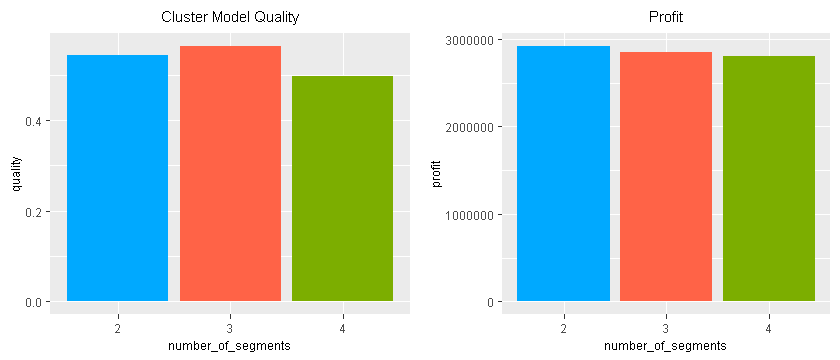

In [39]:
potential_market_share.2.1 = cluster_size.2.1 / nrow(data.2)
market_share.2.1 = potential_market_share.2.1 * (1/intracluster_dispersion.2.1) * calibration
volume.2.1 = market_size * market_share.2.1
revenue.2.1 = volume.2.1 * price
cost.2.1 = cost.fixed + (cost.variable * volume.2.1)
profit.2.1 = revenue.2.1 - cost.2.1

potential_market_share.2.2 = cluster_size.2.2 / nrow(data.2)
market_share.2.2 = potential_market_share.2.2 * (1/intracluster_dispersion.2.2) * calibration
volume.2.2 = market_size * market_share.2.2
revenue.2.2 = volume.2.2 * price
cost.2.2 = cost.fixed + (cost.variable * volume.2.2)
profit.2.2 = revenue.2.2 - cost.2.2

profit.2 = profit.2.1 + profit.2.2


potential_market_share.3.1 = cluster_size.3.1 / nrow(data.3)
market_share.3.1 = potential_market_share.3.1 * (1/intracluster_dispersion.3.1) * calibration
volume.3.1 = market_size * market_share.3.1
revenue.3.1 = volume.3.1 * price
cost.3.1 = cost.fixed + (cost.variable * volume.3.1)
profit.3.1 = revenue.3.1 - cost.3.1

potential_market_share.3.2 = cluster_size.3.2 / nrow(data.3)
market_share.3.2 = potential_market_share.3.2 * (1/intracluster_dispersion.3.2) * calibration
volume.3.2 = market_size * market_share.3.2
revenue.3.2 = volume.3.2 * price
cost.3.2 = cost.fixed + (cost.variable * volume.3.2)
profit.3.2 = revenue.3.2 - cost.3.2

potential_market_share.3.3 = cluster_size.3.3 / nrow(data.3)
market_share.3.3 = potential_market_share.3.3 * (1/intracluster_dispersion.3.3) * calibration
volume.3.3 = market_size * market_share.3.3
revenue.3.3 = volume.3.3 * price
cost.3.3 = cost.fixed + (cost.variable * volume.3.3)
profit.3.3 = revenue.3.3 - cost.3.3

profit.3 = profit.3.1 + profit.3.2 + profit.3.3


potential_market_share.4.1 = cluster_size.4.1 / nrow(data.4)
market_share.4.1 = potential_market_share.4.1 * (1/intracluster_dispersion.4.1) * calibration
volume.4.1 = market_size * market_share.4.1
revenue.4.1 = volume.4.1 * price
cost.4.1 = cost.fixed + (cost.variable * volume.4.1)
profit.4.1 = revenue.4.1 - cost.4.1

potential_market_share.4.2 = cluster_size.4.2 / nrow(data.4)
market_share.4.2 = potential_market_share.4.2 * (1/intracluster_dispersion.4.2) * calibration
volume.4.2 = market_size * market_share.4.2
revenue.4.2 = volume.4.2 * price
cost.4.2 = cost.fixed + (cost.variable * volume.4.2)
profit.4.2 = revenue.4.2 - cost.4.2

potential_market_share.4.3 = cluster_size.4.3 / nrow(data.4)
market_share.4.3 = potential_market_share.4.3 * (1/intracluster_dispersion.4.3) * calibration
volume.4.3 = market_size * market_share.4.3
revenue.4.3 = volume.4.3 * price
cost.4.3 = cost.fixed + (cost.variable * volume.4.3)
profit.4.3 = revenue.4.3 - cost.4.3

potential_market_share.4.4 = cluster_size.4.4 / nrow(data.4)
market_share.4.4 = potential_market_share.4.4 * (1/intracluster_dispersion.4.4) * calibration
volume.4.4 = market_size * market_share.4.4
revenue.4.4 = volume.4.4 * price
cost.4.4 = cost.fixed + (cost.variable * volume.4.4)
profit.4.4 = revenue.4.4 - cost.4.4

profit.4 = profit.4.1 + profit.4.2 + profit.4.3 + profit.4.4


d = data.frame(number_of_segments=factor(2:4),
               quality=c(quality.2, quality.3, quality.4),
               profit=c(profit.2, profit.3, profit.4))

p1 = ggplot(d) + ggtitle("Cluster Model Quality") +
     geom_col(aes(x=number_of_segments, y=quality, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

p2 = ggplot(d) + ggtitle("Profit") +
     geom_col(aes(x=number_of_segments, y=profit, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

grid.arrange(p1, p2, nrow=1)

In [40]:
market_size = 100000; calibration = 0.10; price = 999.99; cost.fixed = 150000; cost.variable = 100

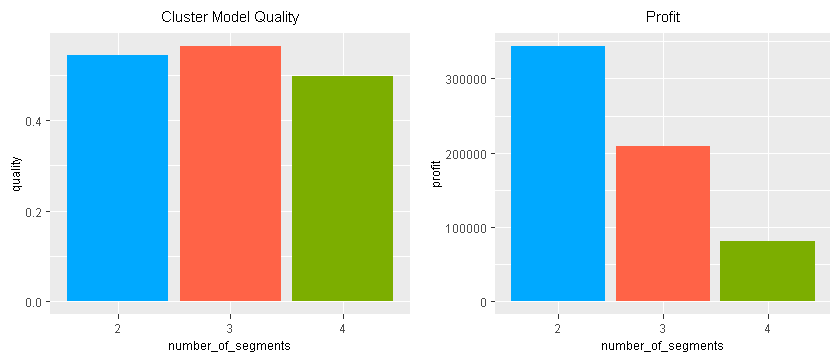

In [41]:
potential_market_share.2.1 = cluster_size.2.1 / nrow(data.2)
market_share.2.1 = potential_market_share.2.1 * (1/intracluster_dispersion.2.1) * calibration
volume.2.1 = market_size * market_share.2.1
revenue.2.1 = volume.2.1 * price
cost.2.1 = cost.fixed + (cost.variable * volume.2.1)
profit.2.1 = revenue.2.1 - cost.2.1

potential_market_share.2.2 = cluster_size.2.2 / nrow(data.2)
market_share.2.2 = potential_market_share.2.2 * (1/intracluster_dispersion.2.2) * calibration
volume.2.2 = market_size * market_share.2.2
revenue.2.2 = volume.2.2 * price
cost.2.2 = cost.fixed + (cost.variable * volume.2.2)
profit.2.2 = revenue.2.2 - cost.2.2

profit.2 = profit.2.1 + profit.2.2


potential_market_share.3.1 = cluster_size.3.1 / nrow(data.3)
market_share.3.1 = potential_market_share.3.1 * (1/intracluster_dispersion.3.1) * calibration
volume.3.1 = market_size * market_share.3.1
revenue.3.1 = volume.3.1 * price
cost.3.1 = cost.fixed + (cost.variable * volume.3.1)
profit.3.1 = revenue.3.1 - cost.3.1

potential_market_share.3.2 = cluster_size.3.2 / nrow(data.3)
market_share.3.2 = potential_market_share.3.2 * (1/intracluster_dispersion.3.2) * calibration
volume.3.2 = market_size * market_share.3.2
revenue.3.2 = volume.3.2 * price
cost.3.2 = cost.fixed + (cost.variable * volume.3.2)
profit.3.2 = revenue.3.2 - cost.3.2

potential_market_share.3.3 = cluster_size.3.3 / nrow(data.3)
market_share.3.3 = potential_market_share.3.3 * (1/intracluster_dispersion.3.3) * calibration
volume.3.3 = market_size * market_share.3.3
revenue.3.3 = volume.3.3 * price
cost.3.3 = cost.fixed + (cost.variable * volume.3.3)
profit.3.3 = revenue.3.3 - cost.3.3

profit.3 = profit.3.1 + profit.3.2 + profit.3.3


potential_market_share.4.1 = cluster_size.4.1 / nrow(data.4)
market_share.4.1 = potential_market_share.4.1 * (1/intracluster_dispersion.4.1) * calibration
volume.4.1 = market_size * market_share.4.1
revenue.4.1 = volume.4.1 * price
cost.4.1 = cost.fixed + (cost.variable * volume.4.1)
profit.4.1 = revenue.4.1 - cost.4.1

potential_market_share.4.2 = cluster_size.4.2 / nrow(data.4)
market_share.4.2 = potential_market_share.4.2 * (1/intracluster_dispersion.4.2) * calibration
volume.4.2 = market_size * market_share.4.2
revenue.4.2 = volume.4.2 * price
cost.4.2 = cost.fixed + (cost.variable * volume.4.2)
profit.4.2 = revenue.4.2 - cost.4.2

potential_market_share.4.3 = cluster_size.4.3 / nrow(data.4)
market_share.4.3 = potential_market_share.4.3 * (1/intracluster_dispersion.4.3) * calibration
volume.4.3 = market_size * market_share.4.3
revenue.4.3 = volume.4.3 * price
cost.4.3 = cost.fixed + (cost.variable * volume.4.3)
profit.4.3 = revenue.4.3 - cost.4.3

potential_market_share.4.4 = cluster_size.4.4 / nrow(data.4)
market_share.4.4 = potential_market_share.4.4 * (1/intracluster_dispersion.4.4) * calibration
volume.4.4 = market_size * market_share.4.4
revenue.4.4 = volume.4.4 * price
cost.4.4 = cost.fixed + (cost.variable * volume.4.4)
profit.4.4 = revenue.4.4 - cost.4.4

profit.4 = profit.4.1 + profit.4.2 + profit.4.3 + profit.4.4


d = data.frame(number_of_segments=factor(2:4),
               quality=c(quality.2, quality.3, quality.4),
               profit=c(profit.2, profit.3, profit.4))

p1 = ggplot(d) + ggtitle("Cluster Model Quality") +
     geom_col(aes(x=number_of_segments, y=quality, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

p2 = ggplot(d) + ggtitle("Profit") +
     geom_col(aes(x=number_of_segments, y=profit, fill=number_of_segments)) +
     scale_fill_manual(values=PALETTE) + theme.no_legend

grid.arrange(p1, p2, nrow=1)

## Discussion

* To improve the model, which variables should you exclude?
* To improve the model, what other variables would you like to have?
* How sensitive is the business value to the business parameters?
* How could you improve the business model?


<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised February 25, 2021
</span>
</p>
</font>